In [62]:
from aocd import data
import numpy as np

In [63]:
grid1 = np.array([list(l) for l in data.splitlines()], dtype=int)
grid = np.pad(grid1, 1, 'maximum')
h, w = grid.shape

In [64]:
low_points = []

s = 0
for (x, y), value in np.ndenumerate(grid):
    if x == 0 or x == h -1 or y == 0 or y == w-1:
        continue

    elif np.all(value < np.array([grid[x-1, y], grid[x+1, y], grid[x, y-1], grid[x, y+1] ])):
        low_points.append((x, y))

In [65]:
sum(grid[x, y]+1 for x, y in low_points)

425

In [66]:
def fill(grid, x, y, fillvalue=-1, boundary=9):
    if grid[x, y] == boundary or grid[x, y] == fillvalue:
        return 0
    grid[x, y] = fillvalue
    return 1 + sum(fill(grid, a, b) for a, b in [(x-1, y), (x+1, y), (x, y-1), (x, y+1)])

basins = np.array([fill(grid, x, y) for x, y in low_points])
biggest_basins = np.sort(basins)[-3:]
print(np.prod(biggest_basins))

1135260


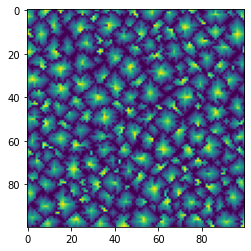

In [70]:
import matplotlib.pyplot as plt
plt.imshow(9-grid1)
# plt.imshow(grid)